In [1]:
import numpy as np

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import random 
import datetime as dt
import re
import pickle
import nltk, warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import digits, punctuation

In [3]:
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
from sklearn import preprocessing, model_selection, metrics, feature_selection

In [5]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline
import os

In [8]:
#print(os.listdir("C:\\Users\\lenovo\\Downloads\\program\\retaildata"))

In [9]:
data = pd.read_csv("datafinal.csv", encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

In [10]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


In [11]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
data.shape

(541909, 8)

In [13]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [14]:
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

Text(0.5, 1.0, 'Ratio of missing values per columns')

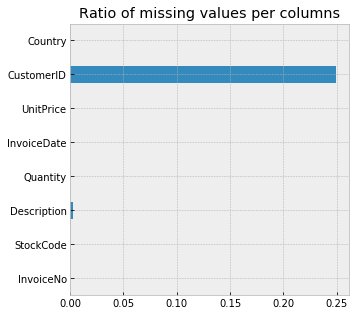

In [15]:
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [16]:
nan_rows = data[data.isnull().T.any().T]
nan_rows.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [17]:
data[data['InvoiceNo']== '536414']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom


In [18]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate, format="%m/%d/%Y %H:%M")

In [19]:
data['Revenue'] = data['Quantity']*data['UnitPrice']

data['Date'] = data['InvoiceDate'].dt.date
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
data['Hour'] = data['InvoiceDate'].dt.hour
data['Week'] = data['InvoiceDate'].dt.week
data['Minute'] = data['InvoiceDate'].dt.minute

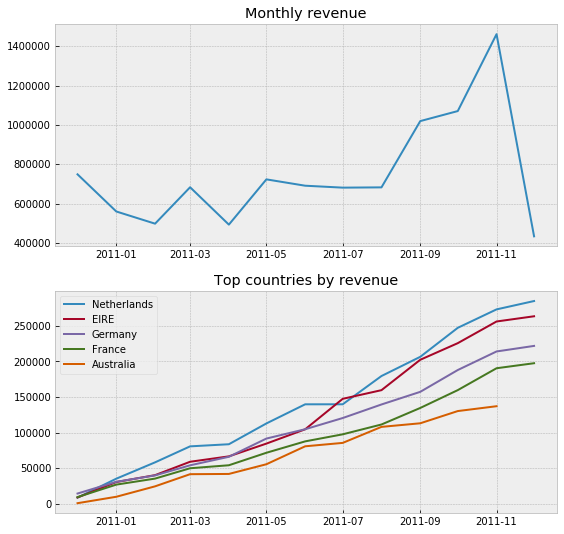

In [20]:
fig, ax = plt.subplots(2,1, figsize=(9, 9))

sales = data[['Year', 'Month', 'Revenue']].groupby(['Year', 'Month']).sum().reset_index()
sales['Day'] = 1
sales['Date'] = pd.to_datetime(sales[['Year', 'Month', 'Day']])
sales = sales.set_index('Date')
sales = sales.drop(['Year', 'Month', 'Day'], axis=1)

ax[0].plot(sales)
ax[0].set_title('Monthly revenue')        


sales_top = data[['Revenue', 'Country']].groupby(['Country']).sum().reset_index().sort_values(by='Revenue', ascending=False)['Country'][1:6]

for c in sales_top:
    sales = data[data['Country'] == c]
    sales = sales[['Year', 'Month', 'Revenue']].groupby(['Year', 'Month']).sum().reset_index()
    sales['Day'] = 1
    sales['Date'] = pd.to_datetime(sales[['Year', 'Month', 'Day']])
    sales = sales.set_index('Date')
    sales = sales.drop(['Year', 'Month', 'Day'], axis=1)
    ax[1].plot(sales.cumsum(), label=c)    
    ax[1].legend()
    ax[1].set_title('Top countries by revenue')            
    
plt.show()

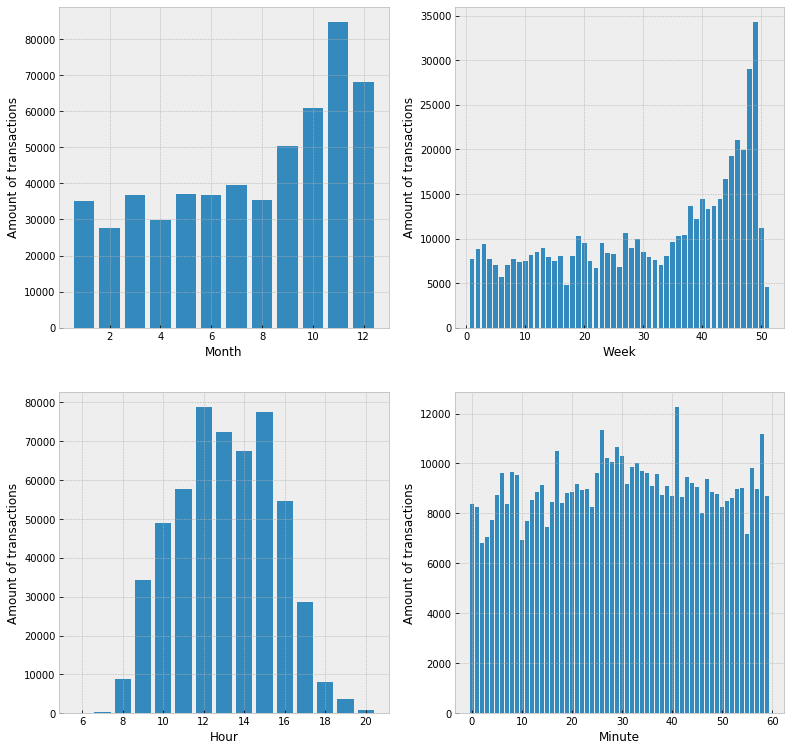

In [21]:
grps = np.array([['Month', 'Week'], ['Hour', 'Minute']])

fig, ax = plt.subplots(grps.shape[0],grps.shape[1], figsize=(13, 13))

for i in range(0, grps.shape[0]):
    for j in range(0, grps.shape[1]):
        grp_data = data[[grps[i,j], 'InvoiceNo']].groupby([grps[i,j]]).count()
        ax[i,j].bar(x=grp_data.index, height='InvoiceNo', data=grp_data)
        ax[i,j].set_ylabel('Amount of transactions')
        ax[i,j].set_xlabel(grps[i,j])
        
plt.show()

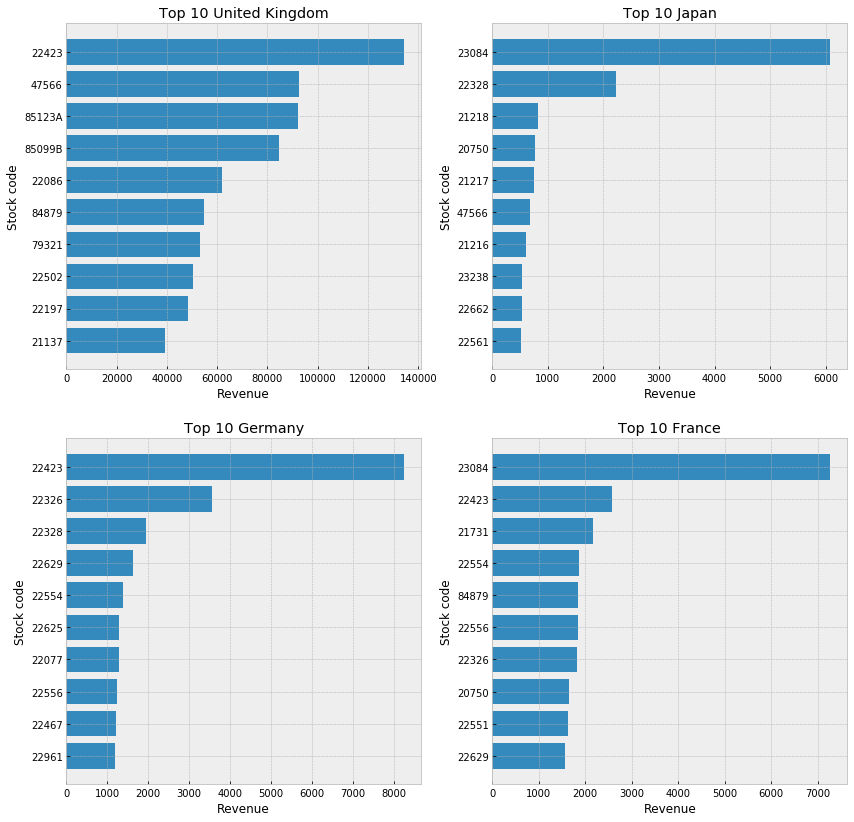

In [22]:
ctry = np.array([['United Kingdom', 'Japan'], ['Germany', 'France']])
fltr = ['DOT', 'POST', 'M']
top_n = 10

fig, ax = plt.subplots(grps.shape[0],grps.shape[1], figsize=(14, 14))

for i in range(0, ctry.shape[0]):
    for j in range(0, ctry.shape[1]):
        grp_data = data[data['Country'] == ctry[i,j]]
        grp_data = grp_data[~grp_data['StockCode'].isin(fltr)]
        grp_data = grp_data[['StockCode', 'Revenue']].groupby(['StockCode']).sum().sort_values(by='Revenue', ascending=False)        
        grp_data = grp_data[0:top_n]    
        grp_data = grp_data.reset_index()
        
        ax[i,j].barh(y=grp_data.index, width='Revenue', data=grp_data)
        ax[i,j].invert_yaxis()
        ax[i,j].set_yticks(range(0,top_n))
        ax[i,j].set_yticklabels(grp_data['StockCode'].tolist())
        ax[i,j].set_ylabel('Stock code')        
        ax[i,j].set_xlabel('Revenue')                
        ax[i,j].set_title('Top 10 ' + ctry[i,j])        
        
plt.show()

In [23]:
data.drop(["Revenue", "Date","Day","Month","Year","Hour","Week","Minute"], axis = 1, inplace = True) 

In [24]:
data[data['InvoiceNo']== '536544'][:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [25]:
data = data.dropna(subset=["CustomerID"])

In [26]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Text(0.5, 1.0, 'Ratio of missing values per columns')

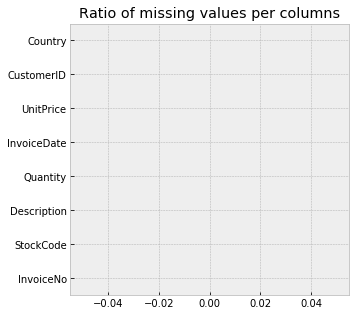

In [27]:
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [28]:
print('Dupplicate entries: {}'.format(data.duplicated().sum()))

Dupplicate entries: 5225


In [29]:
data.drop_duplicates(inplace = True)

In [30]:
print('Dupplicate entries: {}'.format(data.duplicated().sum()))

Dupplicate entries: 0


In [31]:
data.Country.nunique()

37

In [32]:
customer_country=data[['Country','CustomerID']].drop_duplicates()

In [33]:
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False).head()

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


In [34]:
data.describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [35]:
data[(data['Quantity']<=0) | (data['UnitPrice']<0)].count()

InvoiceNo      8872
StockCode      8872
Description    8872
Quantity       8872
InvoiceDate    8872
UnitPrice      8872
CustomerID     8872
Country        8872
dtype: int64

In [36]:
data[(data['Quantity']<0)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [37]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()


In [38]:
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})

In [39]:
temp.head()

,CustomerID,InvoiceNo,InvoiceDate
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


In [40]:
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


In [41]:
nb_products_per_basket.InvoiceNo = nb_products_per_basket.InvoiceNo.astype(str)
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))


In [42]:
len(nb_products_per_basket[nb_products_per_basket['order_canceled']==1])/len(nb_products_per_basket)*100


16.466876971608833

In [43]:
nb_products_per_basket[nb_products_per_basket['order_canceled']==1][:5]

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1


In [44]:
test = data[data['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]

In [45]:
test.head()

,CustomerID,Quantity,StockCode,Description,UnitPrice
141,14527,-1,D,Discount,27.50
154,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,17548,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,17548,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,17548,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29


In [46]:
for index, col in  test.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) 
                & (data['Description'] == col[2])].shape[0] == 0: 
        print(test.loc[index])
        print('Our initial hypothesis is wrong')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
Our initial hypothesis is wrong


In [47]:
data[data['CustomerID'] == '14527'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom


In [48]:
data_check = data[(data['Quantity'] < 0) & (data['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  data_check.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) 
                & (data['Description'] == col[2])].shape[0] == 0: 
        print(index, data_check.loc[index])
        print('The second hypothesis is also wrong')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
The second hypothesis is also wrong


In [49]:
data[(data['CustomerID'] == '15311') & (data['Description'] == 'SET OF 3 COLOURED  FLYING DUCKS')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


In [50]:
df_cleaned = data.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  data.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = data[(data['CustomerID'] == col['CustomerID']) &
                         (data['StockCode']  == col['StockCode']) & 
                         (data['InvoiceDate'] < col['InvoiceDate']) & 
                         (data['Quantity']   > 0)].copy()
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break    

In [51]:
df_test
for i,j in data.iterrows():
    print(j)
    if i==0:
        break
df_test.index[0]

InvoiceNo                                  536365
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        6
InvoiceDate                   2010-12-01 08:26:00
UnitPrice                                    2.55
CustomerID                                  17850
Country                            United Kingdom
Name: 0, dtype: object


433318

In [52]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


In [53]:
df_cleaned.drop(remaining_entries.index, axis = 0, inplace = True)

In [54]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [55]:
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'POST']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'D']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'C2']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'M']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'BANK CHARGES']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'PADS']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'DOT']

In [56]:
df_cleaned.describe()

,Quantity,UnitPrice,QuantityCanceled
count,391183.000000,391183.000000,391183.000000
mean,13.179665,2.874130,0.626569
std,181.907403,4.284639,175.902239
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,0.000000
50%,6.000000,1.950000,0.000000
75%,12.000000,3.750000,0.000000
max,80995.000000,649.500000,80995.000000


In [57]:
df_cleaned[(df_cleaned['UnitPrice'] == 0)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0


In [58]:
for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37


In [59]:
def unique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
unique_counts(df_cleaned)

InvoiceNo :  18405
StockCode :  3659
Description :  3871
Quantity :  300
InvoiceDate :  17169
UnitPrice :  356
CustomerID :  4335
Country :  37
QuantityCanceled :  122


In [60]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])

Text(0.5, 1.0, 'Revenue per Country')

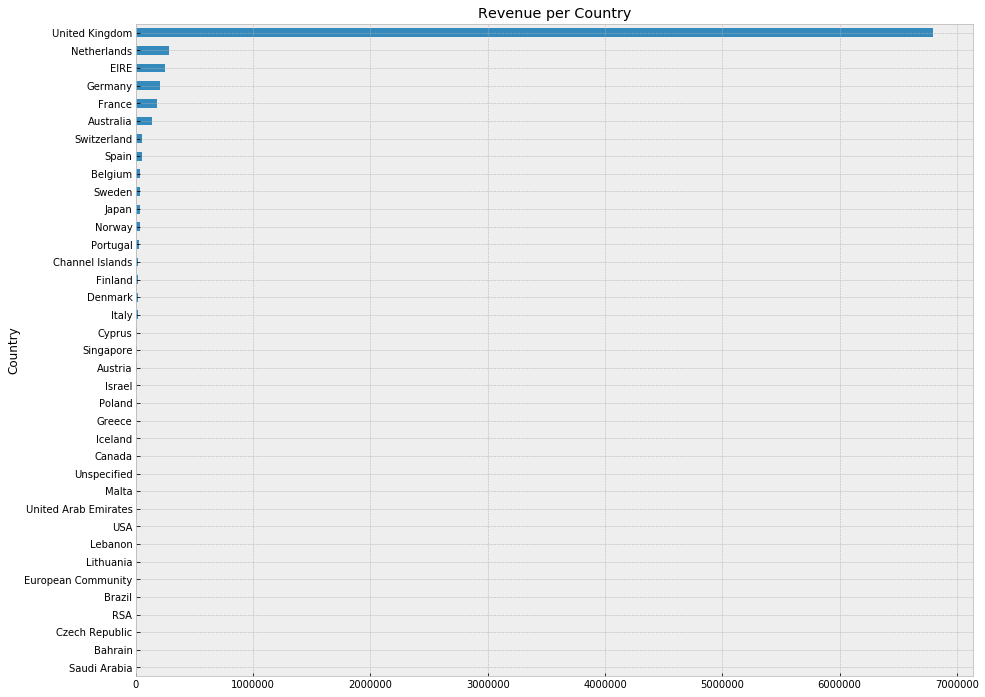

In [61]:
revenue_per_countries = df_cleaned.groupby(["Country"])["TotalPrice"].sum().sort_values()
revenue_per_countries.plot(kind='barh', figsize=(15,12))
plt.title("Revenue per Country")

Text(0.5, 1.0, 'Number of Invoices per Country')

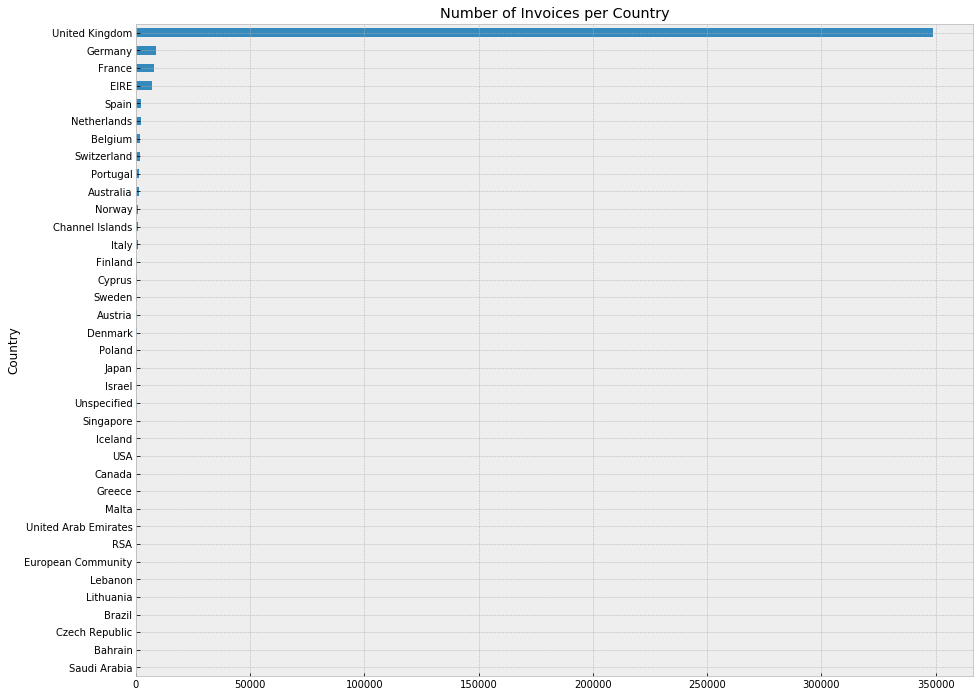

In [62]:
No_invoice_per_country = df_cleaned.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.plot(kind='barh', figsize=(15,12))
plt.title("Number of Invoices per Country")

In [63]:
le = LabelEncoder()
le.fit(df_cleaned['Country'])

LabelEncoder()

In [64]:
l = [i for i in range(37)]
dict(zip(list(le.classes_), l))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [65]:
df_cleaned['Country'] = le.transform(df_cleaned['Country'])

In [66]:
with open('labelencoder.pickle', 'wb') as g:
    pickle.dump(le, g)

In [67]:
df_cleaned.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,35,0,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,35,0,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,35,0,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,35,0,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,35,0,54.08


In [68]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
revenue_per_countries = df_cleaned.groupby(["Country"])["TotalPrice"].sum().sort_values()
revenue_per_countries.sort_values(ascending=False).head()

Country
35    6.797691e+06
23    2.834435e+05
10    2.470746e+05
14    2.015207e+05
13    1.815296e+05
Name: TotalPrice, dtype: float64

Text(0.5, 1.0, 'Revenue per Country')

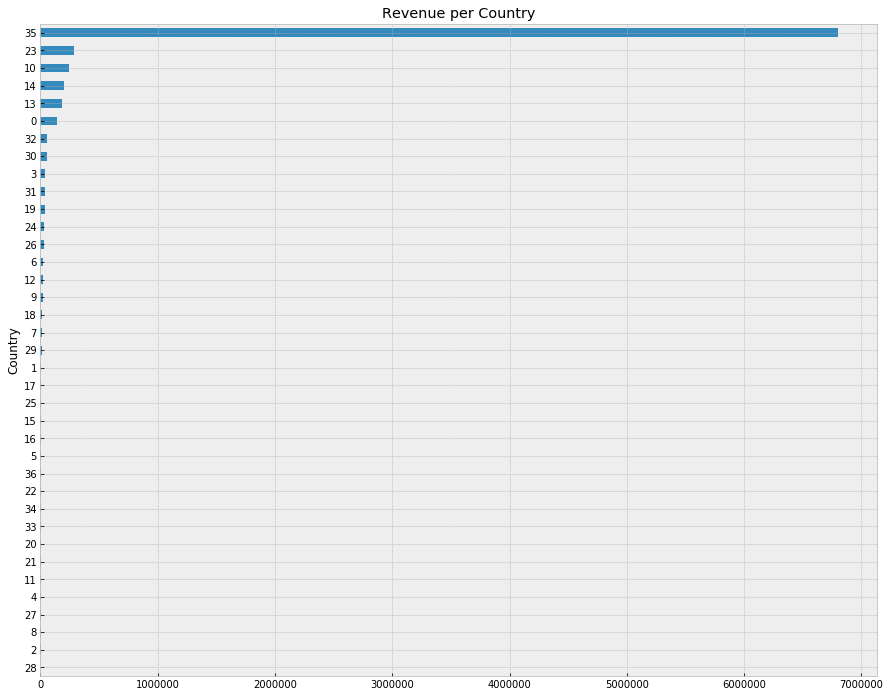

In [69]:
revenue_per_countries.plot(kind='barh',figsize=(15,12))
plt.title('Revenue per Country')

In [70]:
No_invoice_per_country=df_cleaned.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.head()

Country
28     9
2     17
8     24
4     32
21    35
Name: InvoiceNo, dtype: int64

Text(0.5, 1.0, 'Number of Invoices per Country')

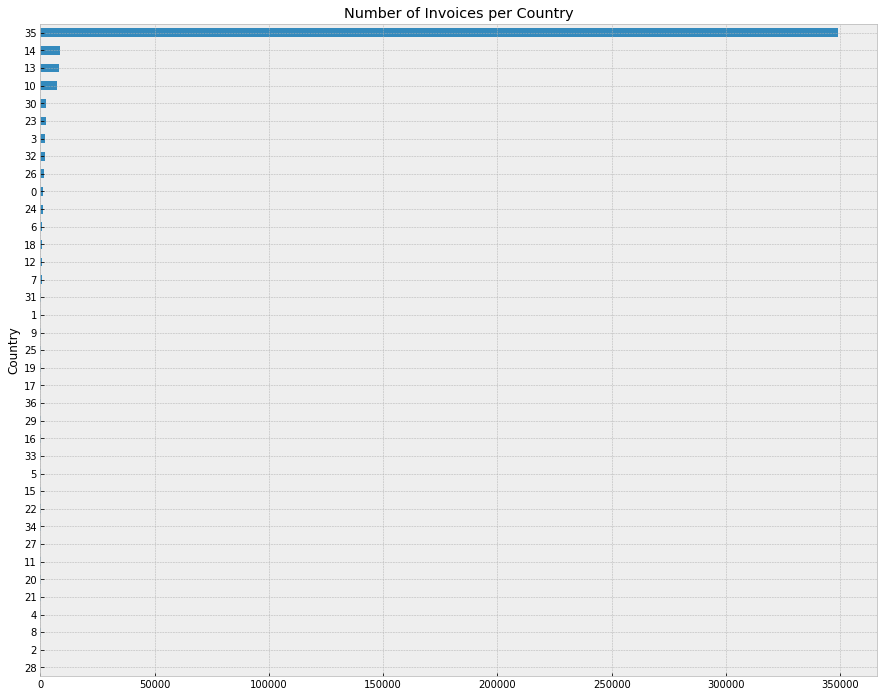

In [71]:
No_invoice_per_country.plot(kind='barh',figsize=(15,12))
plt.title("Number of Invoices per Country")

In [72]:
from sklearn import preprocessing, metrics, feature_selection

In [73]:
le = preprocessing.LabelEncoder()

In [74]:

le.fit(df_cleaned['Country'])

LabelEncoder()

In [75]:
l = [i for i in range(37)]
dict(zip(list(le.classes_), l))

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36}

In [76]:
df_cleaned['Country'] = le.transform(df_cleaned['Country'])

In [77]:
with open('labelencoder.pickle', 'wb') as g:
    pickle.dump(le, g)
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34


In [78]:
df_cleaned['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [79]:
df_cleaned['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [80]:
NOW = dt.datetime(2011,12,10)
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [81]:
custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["TotalPrice"] = "sum"


rfmTable = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation)

In [82]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]")

In [83]:
rfmTable.head(5)

,InvoiceDate,CustomerID,TotalPrice,Recency
InvoiceNo,,,,
536365,2010-12-01 08:26:00,17850,139.12,373.0
536366,2010-12-01 08:28:00,17850,22.20,373.0
536367,2010-12-01 08:34:00,13047,278.73,373.0
536368,2010-12-01 08:34:00,13047,70.05,373.0
536369,2010-12-01 08:35:00,13047,17.85,373.0


In [84]:
custom_aggregation = {}

custom_aggregation["Recency"] = ["min", "max"]
custom_aggregation["InvoiceDate"] = lambda x: len(x)
custom_aggregation["TotalPrice"] = "sum"

rfmTable_final = rfmTable.groupby("CustomerID").agg(custom_aggregation)

In [85]:
rfmTable_final.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]

In [86]:
rfmTable_final.head(5)

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346,325.0,325.0,1,0.00
12347,2.0,367.0,7,4310.00
12348,75.0,358.0,4,1437.24
12349,18.0,18.0,1,1457.55
12350,310.0,310.0,1,294.40


In [87]:
first_customer = df_cleaned[df_cleaned['CustomerID']=='12747']
first_customer.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747,35,0,30.60
9755,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,2.55,12747,35,0,15.30
9756,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,1.69,12747,35,0,27.04
9757,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,1.65,12747,35,0,39.60
9758,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5.45,12747,35,0,32.70


In [88]:
quantiles = rfmTable_final.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [89]:
segmented_rfm = rfmTable_final

In [90]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [91]:
segmented_rfm['r_quartile'] = segmented_rfm['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4
12347,2.0,367.0,7,4310.00,1,1,1
12348,75.0,358.0,4,1437.24,3,2,2
12349,18.0,18.0,1,1457.55,2,4,2
12350,310.0,310.0,1,294.40,4,4,4


In [92]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4,444
12347,2.0,367.0,7,4310.00,1,1,1,111
12348,75.0,358.0,4,1437.24,3,2,2,322
12349,18.0,18.0,1,1457.55,2,4,2,242
12350,310.0,310.0,1,294.40,4,4,4,444


In [93]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
14646,1.0,354.0,73,278742.02,1,1,1,111
18102,0.0,367.0,60,259657.30,1,1,1,111
17450,8.0,367.0,46,193417.63,1,1,1,111
14911,1.0,373.0,198,129075.91,1,1,1,111
14156,9.0,371.0,54,113720.20,1,1,1,111


In [94]:
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4,444
12347,2.0,367.0,7,4310.00,1,1,1,111
12348,75.0,358.0,4,1437.24,3,2,2,322
12349,18.0,18.0,1,1457.55,2,4,2,242
12350,310.0,310.0,1,294.40,4,4,4,444


In [95]:
segmented_rfm = segmented_rfm.reset_index()

In [96]:
segmented_rfm.head(5)

,CustomerID,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
0,12346,325.0,325.0,1,0.00,4,4,4,444
1,12347,2.0,367.0,7,4310.00,1,1,1,111
2,12348,75.0,358.0,4,1437.24,3,2,2,322
3,12349,18.0,18.0,1,1457.55,2,4,2,242
4,12350,310.0,310.0,1,294.40,4,4,4,444


In [97]:
df_cleaned = pd.merge(df_cleaned,segmented_rfm, on='CustomerID')

In [98]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value',
       'r_quartile', 'f_quartile', 'm_quartile', 'RFMScore'],
      dtype='object')

In [99]:
df_cleaned = df_cleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])

In [100]:
X = df_cleaned["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (3871, 1694) of float64


In [101]:
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (3871, 100) of float64


In [102]:
score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

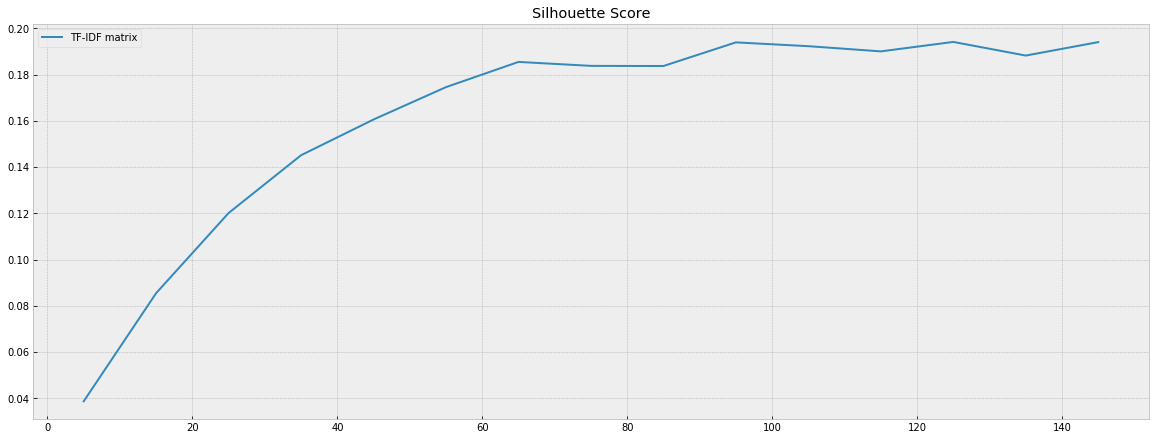

In [103]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Silhouette Score")
plt.legend()

Text(0.5, 1.0, 'ACP with 135 clusters')

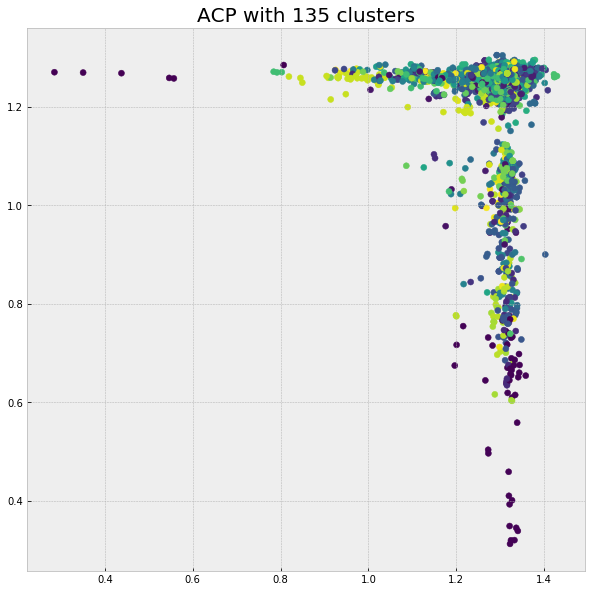

In [104]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 135 clusters", fontsize="20")

<Figure size 432x288 with 0 Axes>

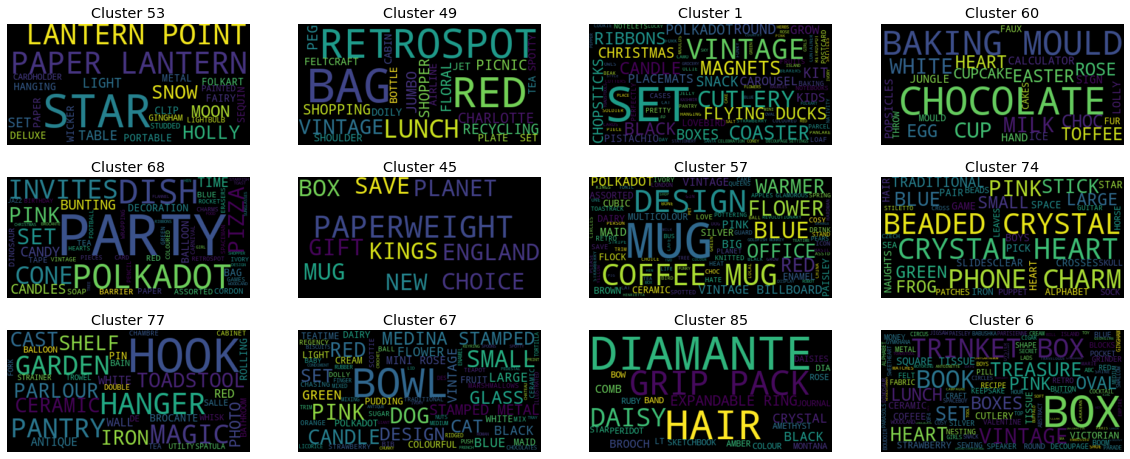

<Figure size 432x288 with 0 Axes>

In [105]:
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

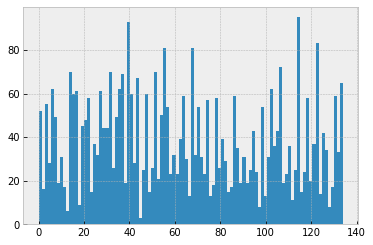

In [106]:
pd.Series(clusters).hist(bins=100)

In [107]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(X, clusters)}

In [108]:
with open('product_clusters.pickle', 'wb') as h:
    pickle.dump(dict_article_to_cluster, h)

In [109]:
cluster = df_cleaned['Description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster").mul(df_cleaned["TotalPrice"], 0)
df2 = pd.concat([df_cleaned['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum()

In [110]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = lambda x:x.iloc[0]
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]


df_grouped = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation)

In [111]:
df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
df2_grouped_final = df2_grouped_final.fillna(0)

In [112]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = ['min','max','mean']
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_grouped_final = df_grouped.groupby("CustomerID").agg(custom_aggregation)

In [113]:
df_grouped_final.head(5)

TotalPrice                   min_recency max_recency frequency  \
                  min    max       mean    <lambda>    <lambda>  <lambda>   
CustomerID                                                                  
12346             0.0    0.0   0.000000       325.0       325.0         1   
12347            13.2   45.0  23.308571         2.0       367.0         7   
12348            39.6  150.0  82.840000        75.0       358.0         4   
12349            15.0   15.0  15.000000        18.0        18.0         1   
12350            25.2   25.2  25.200000       310.0       310.0         1   

           monetary_value Quantity  Country  
                 <lambda>      sum <lambda>  
CustomerID                                   
12346                0.00    74215       35  
12347             4310.00     2458       16  
12348             1437.24     2332       12  
12349             1457.55      630       18  
12350              294.40      196       24

In [114]:
df_grouped_final.columns = ["min", "max", "mean", "min_recency", "max_recency", "frequency", "monetary_value", "quantity", "country"]

In [115]:
df_grouped_final.head(5)

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country
CustomerID,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24


In [116]:
df_grouped_final.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country
CustomerID,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24


In [117]:
df2_grouped_final.head(5)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
12347,0.0,0.000000,0.0,0.000000,0.0,0.0,0.023596,0.003081,0.004037,0.0,...,0.000000,0.000000,0.0,0.0,0.006125,0.015452,0.0,0.014756,0.00348,0.020441
12348,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
12349,0.0,0.004556,0.0,0.008748,0.0,0.0,0.043017,0.000000,0.011938,0.0,...,0.014408,0.005351,0.0,0.0,0.011320,0.010291,0.0,0.027409,0.00000,0.105279
12350,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


In [118]:
X1 = df_grouped_final.as_matrix()
X2 = df2_grouped_final.as_matrix()

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

In [119]:
x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

n_clusters = 2
The average silhouette_score is : 0.8809013076670333 with Std Scaling
n_clusters = 3
The average silhouette_score is : 0.25825552337614843 with Std Scaling
n_clusters = 4
The average silhouette_score is : 0.23858921148271192 with Std Scaling
n_clusters = 5
The average silhouette_score is : 0.3002903454390598 with Std Scaling
n_clusters = 6
The average silhouette_score is : 0.3889332727541475 with Std Scaling
n_clusters = 7
The average silhouette_score is : 0.39871194310240127 with Std Scaling
n_clusters = 8
The average silhouette_score is : 0.404539634412033 with Std Scaling
n_clusters = 9
The average silhouette_score is : 0.41012503601792477 with Std Scaling
n_clusters = 10
The average silhouette_score is : 0.40942699976815106 with Std Scaling
n_clusters = 11
The average silhouette_score is : 0.40488765375380203 with Std Scaling


In [120]:
kmeans = KMeans(init='k-means++', n_clusters = 9, n_init=30, random_state=0)  # random state just to be able to provide cluster number durint analysis
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

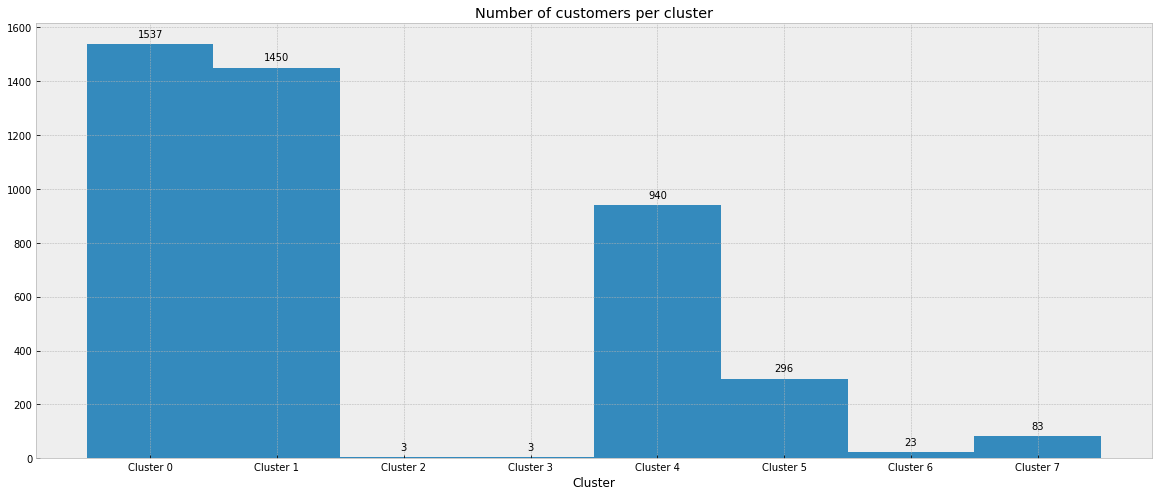

In [121]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(8)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [122]:
df_grouped_final["cluster"] = clusters

In [123]:
final_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
final_dataset.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,6,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,5,...,0.000000,0.000000,0.0,0.0,0.006125,0.015452,0.0,0.014756,0.00348,0.020441
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,5,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,5,...,0.014408,0.005351,0.0,0.0,0.011320,0.010291,0.0,0.027409,0.00000,0.105279
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,4,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


In [124]:
final_dataset_V2 = final_dataset.reset_index()

In [125]:
final_dataset_V2.head()

,CustomerID,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,...,0.000000,0.000000,0.0,0.0,0.006125,0.015452,0.0,0.014756,0.00348,0.020441
2,12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3,12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,...,0.014408,0.005351,0.0,0.0,0.011320,0.010291,0.0,0.027409,0.00000,0.105279
4,12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


In [126]:
final_dataset_V2.to_csv("final_dataset_V2.csv",index=False)

In [127]:
with open('df_cleaned.pickle', 'wb') as f:
    pickle.dump(df_cleaned, f)

Text(0.5, 1.0, 'Clustering with TSNE')

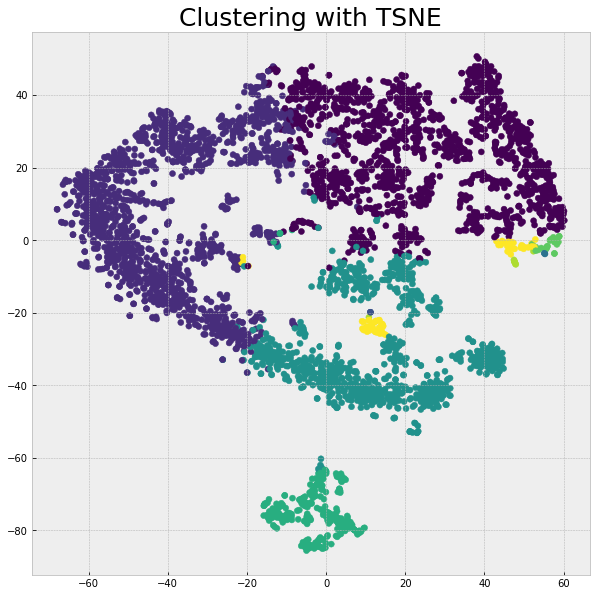

In [128]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Clustering with TSNE", fontsize="25")

In [129]:
final_dataset[final_dataset['cluster']==0].head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12352,0.0,35.70,16.842857,36.0,296.0,7,1265.41,526,24,0,...,0.0,0.000000,0.0,0.0,0.000000,0.092816,0.009862,0.000000,0.0,0.011735
12356,25.5,102.00,51.300000,22.0,325.0,3,2487.43,1573,26,0,...,0.0,0.042855,0.0,0.0,0.020101,0.000000,0.000000,0.000000,0.0,0.079661
12363,15.9,69.36,42.630000,109.0,242.0,2,552.00,408,36,0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.028804
12409,0.0,79.20,47.200000,78.0,182.0,3,11056.93,5551,32,0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.004070,0.0,0.082493
12421,9.9,30.00,18.225000,15.0,319.0,4,639.04,478,30,0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.027698,0.0,0.000000


In [130]:
final_dataset[final_dataset['cluster']==0].mean()

min                  9.585094
max                 65.930748
mean                28.990922
min_recency         36.549772
max_recency        311.949252
frequency            6.956409
monetary_value    2561.984066
quantity          1515.439818
country             34.860768
cluster              0.000000
Cluster_0            0.000017
Cluster_1            0.014355
Cluster_2            0.003815
Cluster_3            0.000731
Cluster_4            0.007475
Cluster_5            0.010514
Cluster_6            0.018495
Cluster_7            0.002249
Cluster_8            0.004098
Cluster_9            0.027757
Cluster_10           0.006568
Cluster_11           0.000183
Cluster_12           0.000118
Cluster_13           0.000218
Cluster_14           0.024943
Cluster_15           0.001798
Cluster_16           0.016342
Cluster_17           0.006761
Cluster_18           0.002549
Cluster_19           0.008042
                     ...     
Cluster_105          0.008692
Cluster_106          0.001216
Cluster_10

In [131]:
temp_final_df = final_dataset.reset_index()

In [132]:
temp_final_df.head()

,CustomerID,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,...,0.000000,0.000000,0.0,0.0,0.006125,0.015452,0.0,0.014756,0.00348,0.020441
2,12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3,12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,...,0.014408,0.005351,0.0,0.0,0.011320,0.010291,0.0,0.027409,0.00000,0.105279
4,12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


In [133]:
temp_final_df.drop(["max_recency"], axis = 1, inplace = True) 

In [134]:
temp_final_df.head(10)

,CustomerID,min,max,mean,min_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,325.0,1,0.00,74215,35,6,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,12347,13.2,45.0,23.308571,2.0,7,4310.00,2458,16,5,...,0.000000,0.000000,0.0,0.0,0.006125,0.015452,0.000000,0.014756,0.00348,0.020441
2,12348,39.6,150.0,82.840000,75.0,4,1437.24,2332,12,5,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,12349,15.0,15.0,15.000000,18.0,1,1457.55,630,18,5,...,0.014408,0.005351,0.0,0.0,0.011320,0.010291,0.000000,0.027409,0.00000,0.105279
4,12350,25.2,25.2,25.200000,310.0,1,294.40,196,24,4,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,12352,0.0,35.7,16.842857,36.0,7,1265.41,526,24,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.092816,0.009862,0.000000,0.00000,0.011735
6,12353,19.9,19.9,19.900000,204.0,1,89.00,20,2,5,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,12354,20.8,20.8,20.800000,232.0,1,1079.40,530,30,4,...,0.000000,0.000000,0.0,0.0,0.000000,0.034186,0.000000,0.000000,0.00000,0.181962
8,12355,30.0,30.0,30.000000,214.0,1,459.40,240,2,5,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,12356,25.5,102.0,51.300000,22.0,3,2487.43,1573,26,0,...,0.000000,0.042855,0.0,0.0,0.020101,0.000000,0.000000,0.000000,0.00000,0.079661


In [135]:
cust0 = list(temp_final_df[temp_final_df['cluster']==0]['CustomerID'])

In [136]:
cust0

['12352',
 '12356',
 '12363',
 '12409',
 '12421',
 '12433',
 '12451',
 '12456',
 '12457',
 '12458',
 '12462',
 '12483',
 '12484',
 '12502',
 '12507',
 '12539',
 '12540',
 '12541',
 '12545',
 '12576',
 '12596',
 '12597',
 '12676',
 '12744',
 '12747',
 '12749',
 '12757',
 '12758',
 '12766',
 '12775',
 '12778',
 '12779',
 '12782',
 '12808',
 '12820',
 '12826',
 '12836',
 '12838',
 '12839',
 '12841',
 '12842',
 '12843',
 '12849',
 '12853',
 '12854',
 '12867',
 '12875',
 '12877',
 '12886',
 '12909',
 '12910',
 '12913',
 '12916',
 '12921',
 '12924',
 '12928',
 '12933',
 '12935',
 '12937',
 '12942',
 '12944',
 '12947',
 '12948',
 '12949',
 '12951',
 '12955',
 '12957',
 '12963',
 '12970',
 '12990',
 '12993',
 '12994',
 '12997',
 '13000',
 '13001',
 '13004',
 '13012',
 '13013',
 '13014',
 '13015',
 '13018',
 '13021',
 '13026',
 '13030',
 '13034',
 '13035',
 '13038',
 '13046',
 '13047',
 '13048',
 '13049',
 '13050',
 '13055',
 '13064',
 '13068',
 '13069',
 '13077',
 '13078',
 '13081',
 '13082',


In [137]:
cluster0 = df_cleaned[df_cleaned['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()

Quantity             9.971108
UnitPrice            2.898204
QuantityCanceled     0.133460
TotalPrice          16.857034
dtype: float64

In [138]:
cluster0['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1347
JUMBO BAG RED RETROSPOT               1068
REGENCY CAKESTAND 3 TIER               976
PARTY BUNTING                          928
ASSORTED COLOUR BIRD ORNAMENT          921
LUNCH BAG RED RETROSPOT                899
LUNCH BAG  BLACK SKULL.                750
SET OF 3 CAKE TINS PANTRY DESIGN       729
LUNCH BAG CARS BLUE                    675
LUNCH BAG PINK POLKADOT                675
Name: Description, dtype: int64

In [139]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

In [140]:
cluster0_grouped['RFMScore'].value_counts()

111    358
211    152
322    123
222    118
122     98
321     78
221     67
311     56
121     47
112     47
323     44
212     43
223     42
333     38
332     37
233     31
312     23
123     20
232     19
133     19
334     19
234     15
132      7
134      6
231      5
324      4
113      3
224      3
331      2
124      2
213      2
412      2
411      2
424      1
433      1
422      1
114      1
313      1
Name: RFMScore, dtype: int64

In [141]:
cluster0_grouped['Country'].value_counts()

35    1502
30      12
32       7
26       6
31       2
25       2
24       2
23       2
36       1
29       1
Name: Country, dtype: int64

In [142]:
cust1 = list(temp_final_df[temp_final_df['cluster']==1]['CustomerID'])

In [143]:
cust1

['12357',
 '12371',
 '12378',
 '12381',
 '12384',
 '12398',
 '12418',
 '12425',
 '12430',
 '12432',
 '12436',
 '12438',
 '12442',
 '12444',
 '12445',
 '12446',
 '12448',
 '12450',
 '12452',
 '12454',
 '12461',
 '12538',
 '12544',
 '12546',
 '12550',
 '12556',
 '12558',
 '12607',
 '12638',
 '12641',
 '12646',
 '12697',
 '12715',
 '12739',
 '12743',
 '12750',
 '12752',
 '12762',
 '12772',
 '12783',
 '12784',
 '12789',
 '12794',
 '12795',
 '12814',
 '12816',
 '12822',
 '12824',
 '12827',
 '12828',
 '12832',
 '12833',
 '12844',
 '12847',
 '12851',
 '12856',
 '12864',
 '12871',
 '12879',
 '12882',
 '12883',
 '12884',
 '12885',
 '12890',
 '12893',
 '12895',
 '12904',
 '12906',
 '12912',
 '12919',
 '12920',
 '12922',
 '12923',
 '12925',
 '12930',
 '12936',
 '12938',
 '12940',
 '12950',
 '12952',
 '12953',
 '12962',
 '12965',
 '12966',
 '12968',
 '12977',
 '12981',
 '12984',
 '12985',
 '12987',
 '12991',
 '12995',
 '13003',
 '13006',
 '13016',
 '13017',
 '13023',
 '13028',
 '13032',
 '13040',


In [144]:
cluster1 = df_cleaned[df_cleaned['CustomerID'].isin(cust1)]
cluster1[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()

Quantity             8.857048
UnitPrice            2.693219
QuantityCanceled     0.108101
TotalPrice          13.377623
dtype: float64

In [145]:
cluster1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore
298003,551986,22855,FINE WICKER HEART,2,2011-05-05 14:41:00,1.25,13888,35,0,2.5,119.0,218.0,2,595.67,333
298004,551986,84836,ZINC METAL HEART DECORATION,12,2011-05-05 14:41:00,1.25,13888,35,0,15.0,119.0,218.0,2,595.67,333
298005,551986,23181,BULL DOG BOTTLE TOP WALL CLOCK,2,2011-05-05 14:41:00,8.25,13888,35,0,16.5,119.0,218.0,2,595.67,333
298006,551986,22700,BLACK AND WHITE DOG BOWL,2,2011-05-05 14:41:00,2.95,13888,35,0,5.9,119.0,218.0,2,595.67,333
298007,551986,22854,CREAM SWEETHEART EGG HOLDER,2,2011-05-05 14:41:00,4.95,13888,35,0,9.9,119.0,218.0,2,595.67,333


In [146]:
cluster1['Description'].value_counts()[:10]

PAPER CHAIN KIT 50'S CHRISTMAS        269
BAKING SET 9 PIECE RETROSPOT          262
WHITE HANGING HEART T-LIGHT HOLDER    250
ASSORTED COLOUR BIRD ORNAMENT         248
REX CASH+CARRY JUMBO SHOPPER          225
HOT WATER BOTTLE KEEP CALM            216
REGENCY CAKESTAND 3 TIER              211
RABBIT NIGHT LIGHT                    201
GARDENERS KNEELING PAD KEEP CALM      195
SPOTTY BUNTING                        191
Name: Description, dtype: int64

In [147]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster1_grouped = cluster1.groupby("CustomerID").agg(custom_aggregation)

In [148]:
cust1 = list(temp_final_df[temp_final_df['cluster']==1]['CustomerID'])
cluster1 = df_cleaned[df_cleaned['CustomerID'].isin(cust1)]
cluster1[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster1['Description'].value_counts()[:10]

PAPER CHAIN KIT 50'S CHRISTMAS        269
BAKING SET 9 PIECE RETROSPOT          262
WHITE HANGING HEART T-LIGHT HOLDER    250
ASSORTED COLOUR BIRD ORNAMENT         248
REX CASH+CARRY JUMBO SHOPPER          225
HOT WATER BOTTLE KEEP CALM            216
REGENCY CAKESTAND 3 TIER              211
RABBIT NIGHT LIGHT                    201
GARDENERS KNEELING PAD KEEP CALM      195
SPOTTY BUNTING                        191
Name: Description, dtype: int64

In [149]:
cust2 = list(temp_final_df[temp_final_df['cluster']==2]['CustomerID'])
cluster2 = df_cleaned[df_cleaned['CustomerID'].isin(cust2)]
cluster2[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster2['Description'].value_counts()[:10]

EMPIRE DESIGN ROSETTE              1
SMALL POPCORN HOLDER               1
METAL SIGN TAKE IT OR LEAVE IT     1
Name: Description, dtype: int64

In [150]:
cust3 = list(temp_final_df[temp_final_df['cluster']==3]['CustomerID'])
cluster3 = df_cleaned[df_cleaned['CustomerID'].isin(cust3)]
cluster3[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster3['Description'].value_counts()[:10]

SPACEBOY LUNCH BOX                     25
ROUND SNACK BOXES SET OF4 WOODLAND     24
CREAM HEART CARD HOLDER                22
WOOD BLACK BOARD ANT WHITE FINISH      19
DOLLY GIRL LUNCH BOX                   19
ROUND SNACK BOXES SET OF 4 FRUITS      17
BLACK HEART CARD HOLDER                17
SPACEBOY BIRTHDAY CARD                 16
JUMBO BAG RED RETROSPOT                15
MEMO BOARD RETROSPOT  DESIGN           15
Name: Description, dtype: int64

In [151]:
cust4= list(temp_final_df[temp_final_df['cluster']==4]['CustomerID'])
cluster4 = df_cleaned[df_cleaned['CustomerID'].isin(cust4)]
cluster4[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster4['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    230
REGENCY CAKESTAND 3 TIER              188
PARTY BUNTING                         138
ASSORTED COLOUR BIRD ORNAMENT         129
JAM MAKING SET WITH JARS              104
NATURAL SLATE HEART CHALKBOARD        103
REX CASH+CARRY JUMBO SHOPPER          103
SET OF 3 CAKE TINS PANTRY DESIGN      101
HEART OF WICKER SMALL                  98
HEART OF WICKER LARGE                  86
Name: Description, dtype: int64

In [152]:
cust5 = list(temp_final_df[temp_final_df['cluster']==5]['CustomerID'])
cluster5 = df_cleaned[df_cleaned['CustomerID'].isin(cust5)]
cluster5[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster5['Description'].value_counts()[:10]

ROUND SNACK BOXES SET OF4 WOODLAND     233
REGENCY CAKESTAND 3 TIER               163
PLASTERS IN TIN WOODLAND ANIMALS       151
ROUND SNACK BOXES SET OF 4 FRUITS      147
RED TOADSTOOL LED NIGHT LIGHT          145
PLASTERS IN TIN CIRCUS PARADE          143
SPACEBOY LUNCH BOX                     137
RABBIT NIGHT LIGHT                     120
PLASTERS IN TIN SPACEBOY               120
WOODLAND CHARLOTTE BAG                 111
Name: Description, dtype: int64

In [153]:
cust6 = list(temp_final_df[temp_final_df['cluster']==6]['CustomerID'])
cluster6 = df_cleaned[df_cleaned['CustomerID'].isin(cust6)]
cluster6[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster6['Description'].value_counts()[:10]

JUMBO BAG RED RETROSPOT               152
REGENCY CAKESTAND 3 TIER              148
WHITE HANGING HEART T-LIGHT HOLDER    131
CHILLI LIGHTS                         115
JUMBO BAG PINK POLKADOT                98
PAPER BUNTING RETROSPOT                97
LUNCH BAG  BLACK SKULL.                95
GUMBALL COAT RACK                      94
LUNCH BAG RED RETROSPOT                93
JUMBO BAG STRAWBERRY                   90
Name: Description, dtype: int64

In [154]:
cust7 = list(temp_final_df[temp_final_df['cluster']==7]['CustomerID'])
cluster7 = df_cleaned[df_cleaned['CustomerID'].isin(cust7)]
cluster7[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster7['Description'].value_counts()[:10]

RED  HARMONICA IN BOX                 11
TRADITIONAL WOODEN SKIPPING ROPE       9
WORLD WAR 2 GLIDERS ASSTD DESIGNS      7
LARGE RED RETROSPOT WINDMILL           6
4 TRADITIONAL SPINNING TOPS            3
BALLOON WATER BOMB PACK OF 35          3
GROW A FLYTRAP OR SUNFLOWER IN TIN     3
RABBIT NIGHT LIGHT                     3
CHILLI LIGHTS                          3
VINTAGE DOILY JUMBO BAG RED            2
Name: Description, dtype: int64

In [155]:
cust8 = list(temp_final_df[temp_final_df['cluster']==8]['CustomerID'])
cluster8 = df_cleaned[df_cleaned['CustomerID'].isin(cust8)]
cluster8[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster8['Description'].value_counts()[:10]

JUMBO BAG RED RETROSPOT               38
BLACK RECORD COVER FRAME              31
RECORD FRAME 7" SINGLE SIZE           29
LUNCH BOX I LOVE LONDON               25
PARTY BUNTING                         20
EDWARDIAN PARASOL NATURAL             19
REGENCY CAKESTAND 3 TIER              19
WHITE HANGING HEART T-LIGHT HOLDER    18
WORLD WAR 2 GLIDERS ASSTD DESIGNS     18
PACK OF 60 PINK PAISLEY CAKE CASES    18
Name: Description, dtype: int64

In [156]:
cust9 = list(temp_final_df[temp_final_df['cluster']==9]['CustomerID'])
cluster9 = df_cleaned[df_cleaned['CustomerID'].isin(cust9)]
cluster9[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean()
cluster9['Description'].value_counts()[:10]

Series([], Name: Description, dtype: int64)

In [157]:
new_df = pd.read_csv("final_dataset_V2.csv")

In [158]:
new_df.head(5)

,CustomerID,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,...,0.000000,0.000000,0.0,0.0,0.006125,0.015452,0.0,0.014756,0.00348,0.020441
2,12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3,12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,...,0.014408,0.005351,0.0,0.0,0.011320,0.010291,0.0,0.027409,0.00000,0.105279
4,12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


In [159]:
new_df.quantity[new_df['CustomerID']=='12346']

Series([], Name: quantity, dtype: int64)

In [160]:
abc=new_df[['CustomerID','cluster']].copy()

In [161]:
abc.head()

,CustomerID,cluster
0,12346,6
1,12347,5
2,12348,5
3,12349,5
4,12350,4


In [166]:
X = new_df.drop(columns=['CustomerID', 'cluster']) 
y = new_df['cluster'].values

In [167]:
X.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,Cluster_0,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,0.0,...,0.000000,0.000000,0.0,0.0,0.006125,0.015452,0.0,0.014756,0.00348,0.020441
2,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,0.0,...,0.014408,0.005351,0.0,0.0,0.011320,0.010291,0.0,0.027409,0.00000,0.105279
4,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


In [168]:
y


array([6, 5, 5, ..., 1, 0, 1], dtype=int64)

In [169]:
scaler = StandardScaler()

In [170]:
X_scaled = scaler.fit_transform(X)

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0, stratify=y)

In [173]:
from sklearn.dummy import DummyClassifier

In [174]:
dummy_biased = DummyClassifier(random_state=0)

dummy_biased.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='stratified')

In [175]:
print("Baseline accuracy", (dummy_biased.score(X_test, y_test))*100)

Baseline accuracy 30.103806228373703


In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("LogisticRegression_classifier accuracy:", (lr.score(X_test, y_test))*100)

LogisticRegression_classifier accuracy: 94.23298731257209


In [196]:
custID=input("Enter your Customer ID")
customerID=int(custID,10)
cluster=abc.cluster[abc['CustomerID']==customerID]
print("You belong to Cluster number : ", clustNo) 
clusterNo=input("Enter cluster number")
clustNo=int(clusterNo,10)
print("Your product recommendations are :")
if (clustNo==0):
    print(cluster0['Description'].value_counts()[:10])
elif (clustNo==1):
    print(cluster1['Description'].value_counts()[:10])   
elif (clustNo==2):
    print(cluster2['Description'].value_counts()[:10])    
elif (clustNo==3):
    print(cluster3['Description'].value_counts()[:10])        
elif (clustNo==4):
    print(cluster4['Description'].value_counts()[:10])   
elif (clustNo==5):
    print(cluster5['Description'].value_counts()[:10])    
elif (clustNo==6):
    print(cluster6['Description'].value_counts()[:10])   
elif (clustNo==7):
    print(cluster7['Description'].value_counts()[:10])   
elif (clustNo==8):
    print(cluster8['Description'].value_counts()[:10]) 

Enter your Customer ID12348
You belong to Cluster number :  5
Enter cluster number5
Your product recommendations are :
ROUND SNACK BOXES SET OF4 WOODLAND     233
REGENCY CAKESTAND 3 TIER               163
PLASTERS IN TIN WOODLAND ANIMALS       151
ROUND SNACK BOXES SET OF 4 FRUITS      147
RED TOADSTOOL LED NIGHT LIGHT          145
PLASTERS IN TIN CIRCUS PARADE          143
SPACEBOY LUNCH BOX                     137
RABBIT NIGHT LIGHT                     120
PLASTERS IN TIN SPACEBOY               120
WOODLAND CHARLOTTE BAG                 111
Name: Description, dtype: int64


In [197]:
custID=input("Enter your Customer ID")
customerID=int(custID,10)
cluster=abc.cluster[abc['CustomerID']==customerID]
print("You belong to Cluster number : ", clustNo) 
clusterNo=input("Enter cluster number")
clustNo=int(clusterNo,10)
print("Your product recommendations are :")
if (clustNo==0):
    print(cluster0['Description'].value_counts()[:10])
elif (clustNo==1):
    print(cluster1['Description'].value_counts()[:10])   
elif (clustNo==2):
    print(cluster2['Description'].value_counts()[:10])    
elif (clustNo==3):
    print(cluster3['Description'].value_counts()[:10])        
elif (clustNo==4):
    print(cluster4['Description'].value_counts()[:10])   
elif (clustNo==5):
    print(cluster5['Description'].value_counts()[:10])    
elif (clustNo==6):
    print(cluster6['Description'].value_counts()[:10])   
elif (clustNo==7):
    print(cluster7['Description'].value_counts()[:10])   
elif (clustNo==8):
    print(cluster8['Description'].value_counts()[:10]) 

Enter your Customer ID12348
You belong to Cluster number :  5
Enter cluster number5
Your product recommendations are :
ROUND SNACK BOXES SET OF4 WOODLAND     233
REGENCY CAKESTAND 3 TIER               163
PLASTERS IN TIN WOODLAND ANIMALS       151
ROUND SNACK BOXES SET OF 4 FRUITS      147
RED TOADSTOOL LED NIGHT LIGHT          145
PLASTERS IN TIN CIRCUS PARADE          143
SPACEBOY LUNCH BOX                     137
RABBIT NIGHT LIGHT                     120
PLASTERS IN TIN SPACEBOY               120
WOODLAND CHARLOTTE BAG                 111
Name: Description, dtype: int64
